# Grammar of Graphics in Python and Plotnine Guide

We will call the **Seaborn** library to collect Sample data which will be resorted to for plotting purposes throughout the tutorial

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

# Load the 'tips' dataset
tips_data = sns.load_dataset('tips')


The "tips" dataset integrated inside the latter offers a range of variables related to customer tipping (Sex, Payment, Weather...). Let´s explore these attributes:

In [2]:
for i in range(len(tips_data.columns)):
  print(tips_data.columns[i])

total_bill
tip
sex
smoker
day
time
size


Let´s take a closer look at the type of data we are provided:

In [3]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


What elements are included in the "size" column?

In [ ]:
tips_data.size.unique()

AttributeError: ignored

We obtain an error...why?

The answer lies on the fact that this specific element is named like one of the data´s attributes: its size. We will have to rename this column to check the previous operation

In [4]:
tips_data.rename(columns = {"size":"n_people"}, inplace= True)

We are now able to check what n_people looks like:

In [5]:
tips_data.n_people.unique()

array([2, 3, 4, 1, 6, 5])

This variable accounts for a discrete numerical outcome ranging from 1 to 5 members

Now, assuming some random questions about the data generated by AI, let´s provide the user with an answer taking advantage of **Plotnine**:

## 1) Visualize the distribution of total bill amounts. Try to incorporate additional information like the day of the week or person´s sex.

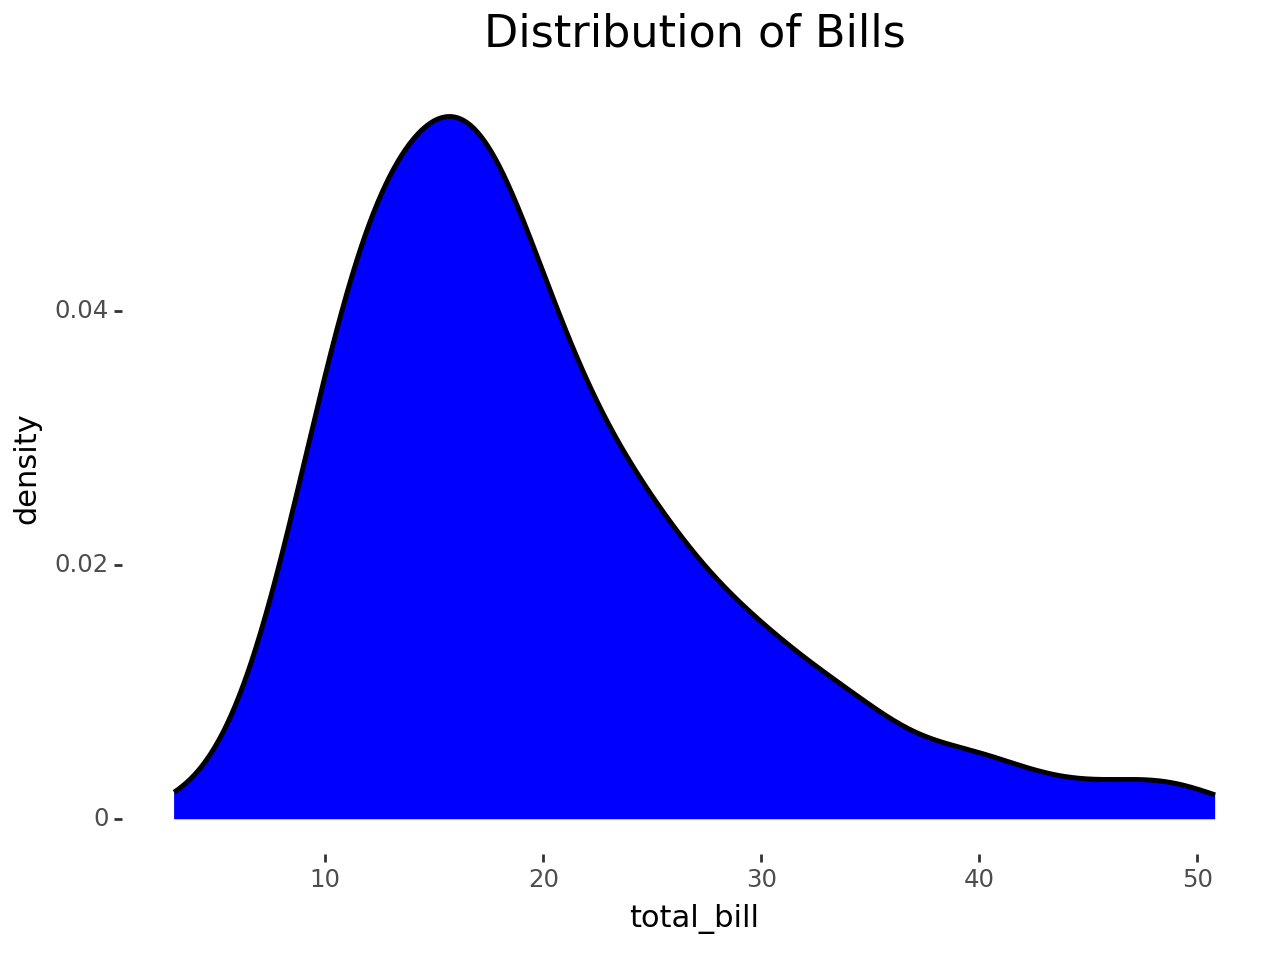

<Figure Size: (640 x 480)>

In [6]:
from plotnine import ggplot,aes,geom_density,theme, element_blank, labs, facet_wrap, geom_boxplot, element_text, geom_point, geom_smooth, annotate, scale_y_continuous,scale_x_continuous, geom_bar, geom_density_2d, element_rect, geom_tile,scale_fill_gradient
ggplot(tips_data) + aes(x = "total_bill") + geom_density(fill = "Blue", color = "black", size = 1) + theme(panel_background=element_blank(),
                                                                                                           plot_title= element_text(size = 16,hjust = 0.5))+labs(title = "Distribution of Bills")

Let´s now incorporate information by sex by including an additional parameter inside the aesthetics. We will facet the data by a "fill" condition and we will map the "sex" into it. To provide some transparency, we resort to the **alpha** parameter inside the geometry:

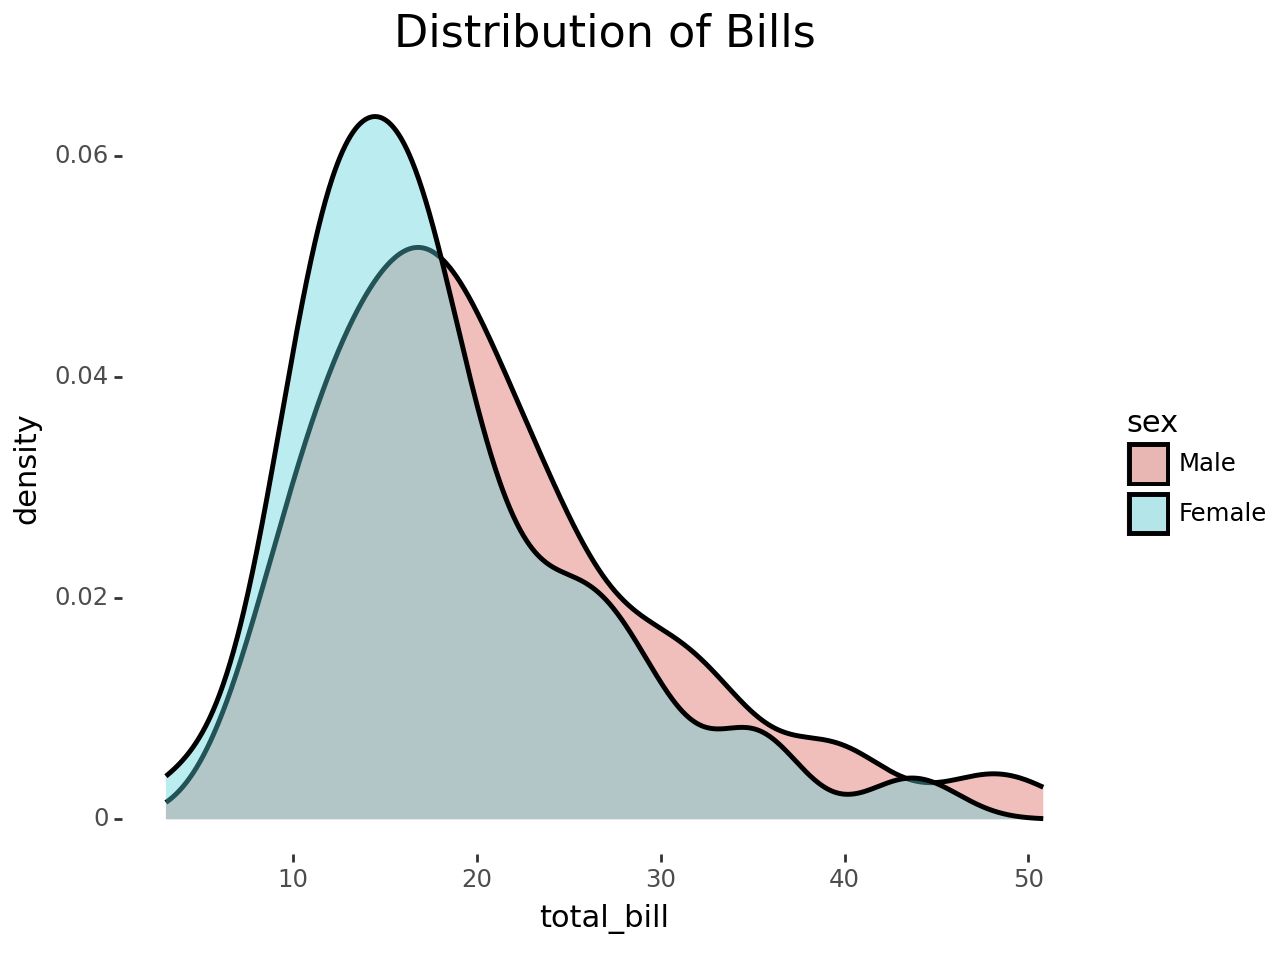

<Figure Size: (640 x 480)>

In [7]:
ggplot(tips_data) + aes(x = "total_bill", fill = "sex") + geom_density(color = "black", size = 1, alpha = 0.4) + theme(panel_background=element_blank(),
                                                                                                           plot_title= element_text(size = 16,hjust = 0.5))+labs(title = "Distribution of Bills")

By faceting by date, one can depict the distribution of the total bill distinguishing by sex:

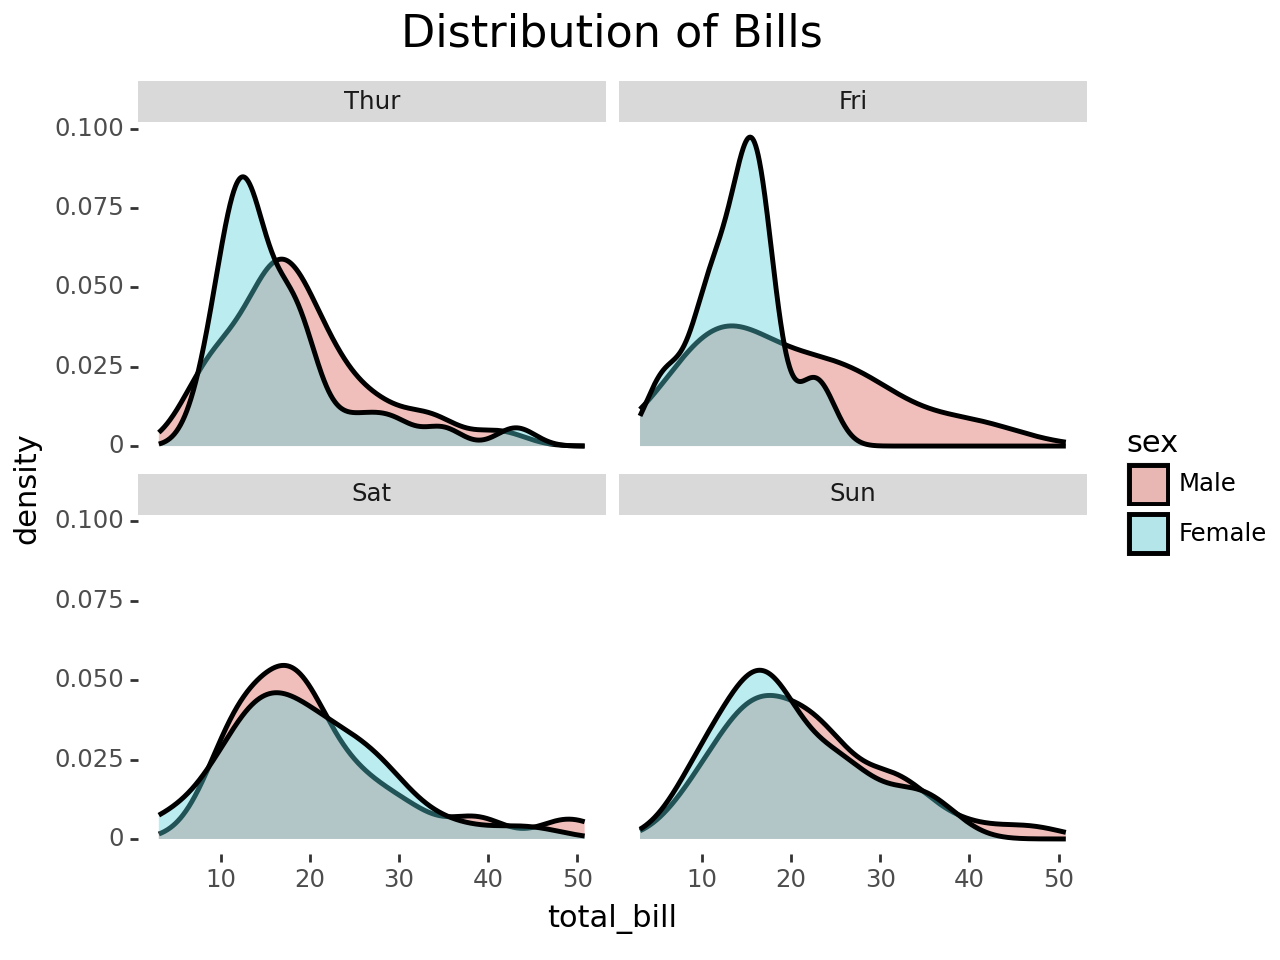

<Figure Size: (640 x 480)>

In [8]:
ggplot(tips_data) + aes(x = "total_bill", fill = "sex") + geom_density(color = "black", size = 1, alpha = 0.4) + theme(panel_background=element_blank(),
                                                                                                      plot_title= element_text(size = 16,hjust = 0.5))+labs(title = "Distribution of Bills")+facet_wrap("~day")

We can already learn some lessons from these plots. The data is, regardless of the week day, positively skewed such that the mean will always remain above the median. This takes place because we own many observations close to the mode but there are some outlier data points biasing the results up. Let´s provide an additional boxplot to check for these conditions:

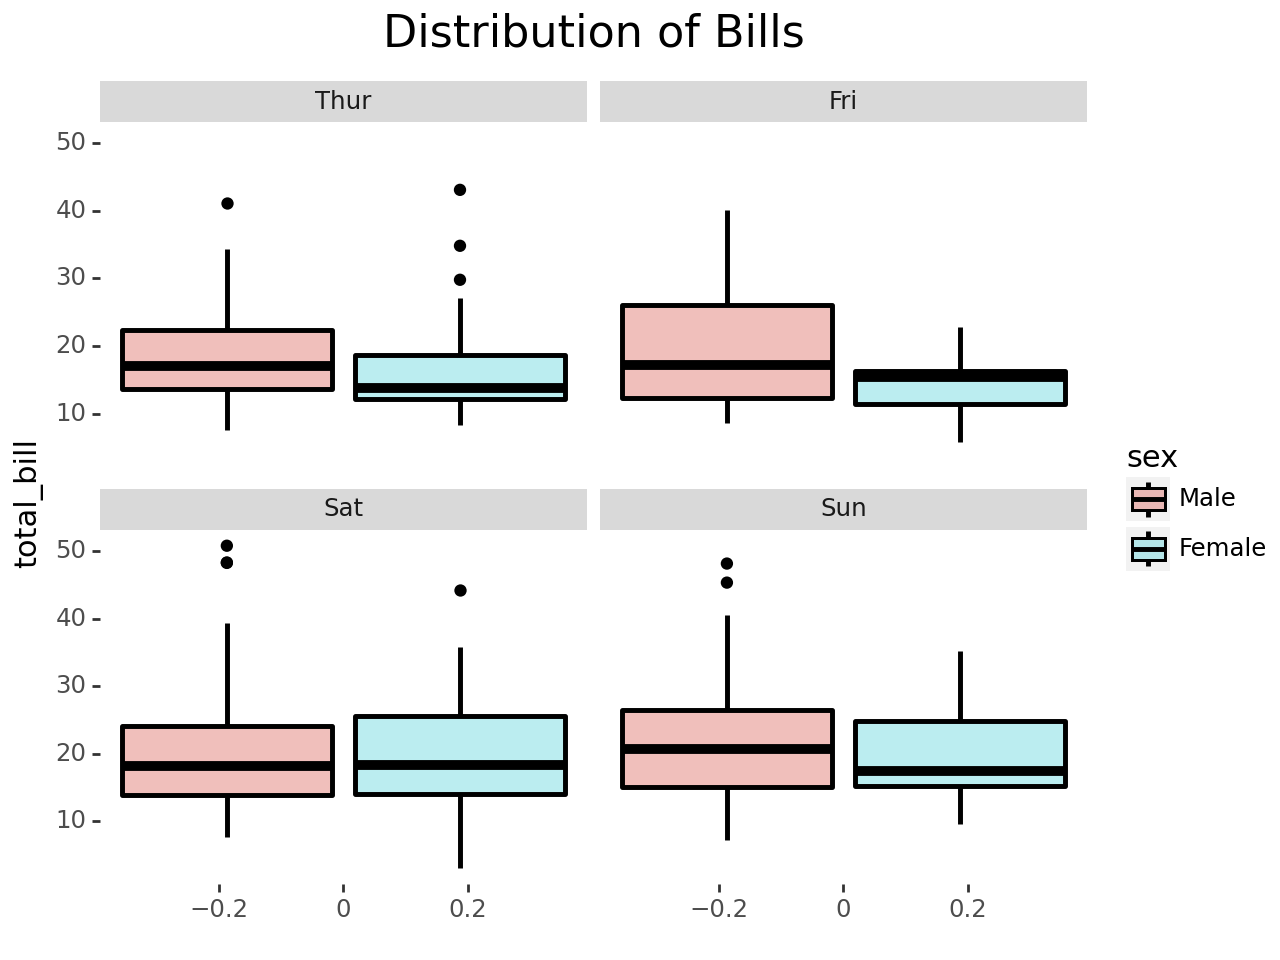

<Figure Size: (640 x 480)>

In [9]:
ggplot(tips_data) + aes(y = "total_bill", fill = "sex") + geom_boxplot(color = "black", size = 1, alpha = 0.4) + theme(panel_background=element_blank(),
                                                                                                      plot_title= element_text(size = 16,hjust = 0.5))+labs(title = "Distribution of Bills")+facet_wrap("~day")

There are some outliers in many of the categories, which can level up the mean and account for the skewed data. We infer that males in the sample are prone to spending more money and this amount is increased on Fridays. Conditional on Fridays and paying attention to females, one observes that the upper quartile holds very close to the median, which means that we have an upper 25% of the data squashed together on the top (negatively skewed). This means that women are paying significantly more on Fridays with respect to Thursdays.

## 2) Visualize the relationship between total bill and tip amounts based on the day of the week. Are there differences in the patterns on different days?

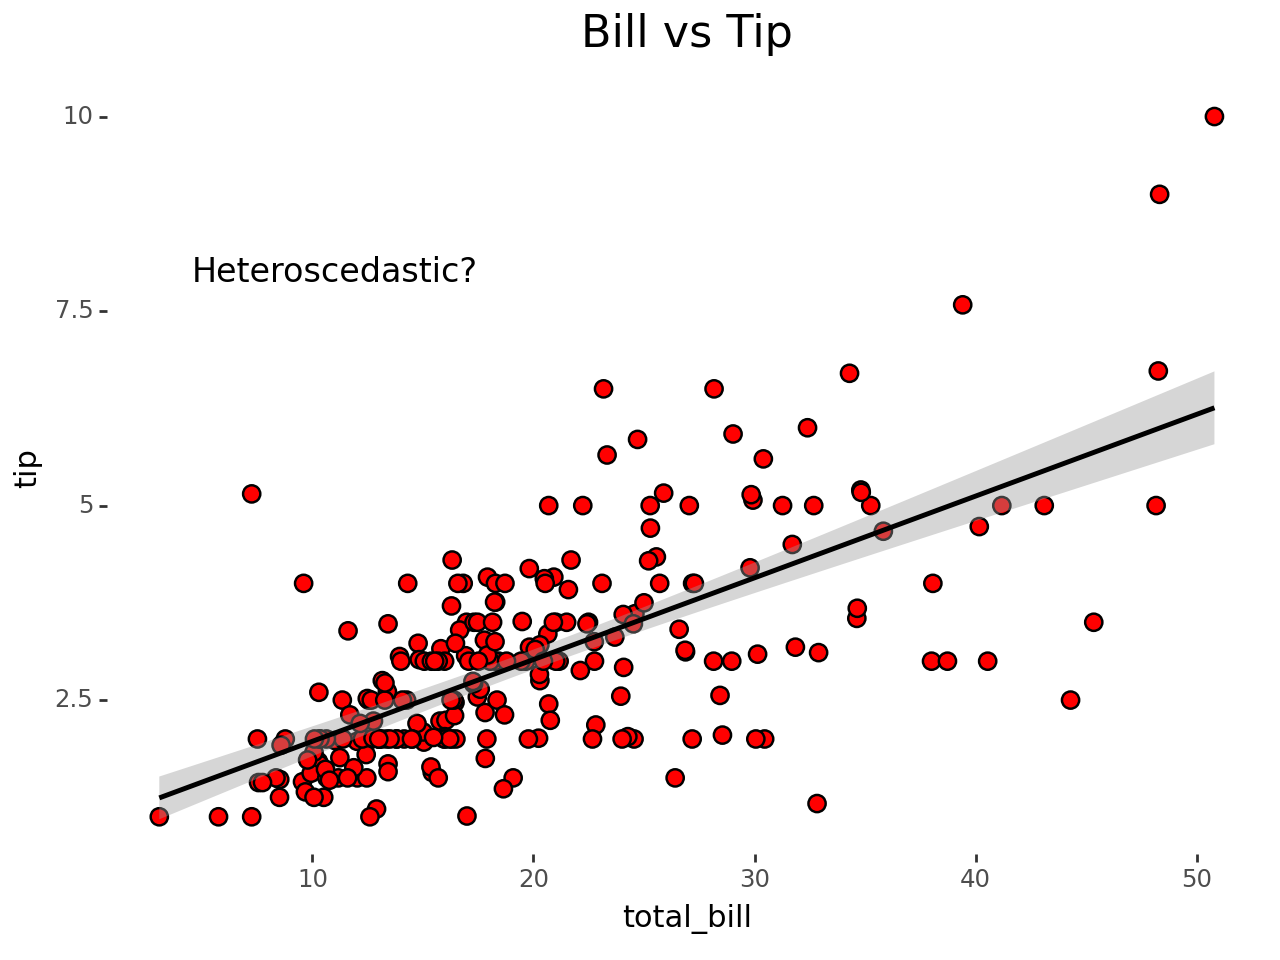

<Figure Size: (640 x 480)>

In [10]:
ggplot(tips_data) + aes(x = "total_bill", y = "tip") + geom_point(size = 3, color = "black", fill = "red") + geom_smooth(method = "lm") + theme(panel_background=element_blank(),
                                                                                                      plot_title= element_text(size = 16,hjust = 0.5))+labs(title = "Bill vs Tip") + annotate("text", x=11, y=8, label="Heteroscedastic?", size=12)

There is an apparent relationship between the total bill and the tipping amount someone is subject to. However, this variability holds unstable and suggests the emergence of heteroscedasticity, which could be an issue if we were to model our results. Let´s apply a logarithm to smooth out the data:

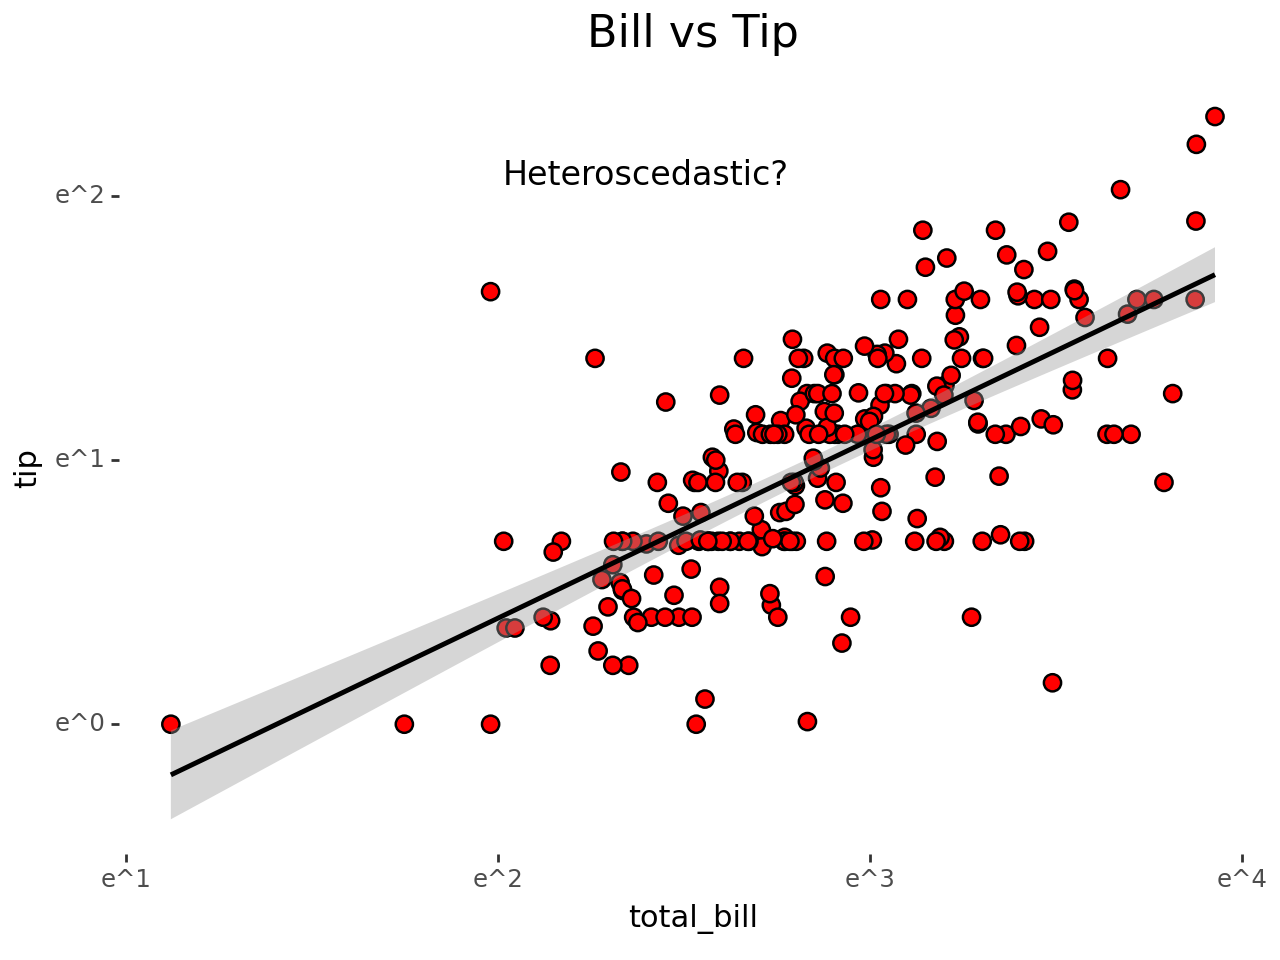

<Figure Size: (640 x 480)>

In [11]:
ggplot(tips_data) + aes(x = "total_bill", y = "tip") + geom_point(size = 3, color = "black", fill = "red") + geom_smooth(method = "lm") + theme(panel_background=element_blank(),
                                                                                                      plot_title= element_text(size = 16,hjust = 0.5))+labs(title = "Bill vs Tip") + annotate("text", x=11, y=8, label="Heteroscedastic?", size=12) + scale_y_continuous(trans='log') + scale_x_continuous(trans='log')

Have we solved this issue? The R squared of a linear model with two unique attributes will match the value of their correlation squared:

In [12]:
round(tips_data[["total_bill","tip"]].corr().tip[0],2)

0.68

We convert these columns to logarithms and compute the correlation again. In a regression, this result would be interpreted as the elasticity between these two variables or the scale factor by which one changes in percentage with respect to the other.

In [13]:
round(tips_data[["total_bill","tip"]].assign(log_1 = lambda x: np.log(x.total_bill)).assign(log_2 = lambda x: np.log(x.tip))[["log_1","log_2"]].corr().log_1[1],2)

0.68

There is not much change...Applying logarithms was not successful. Let´s explore this relationship by date:

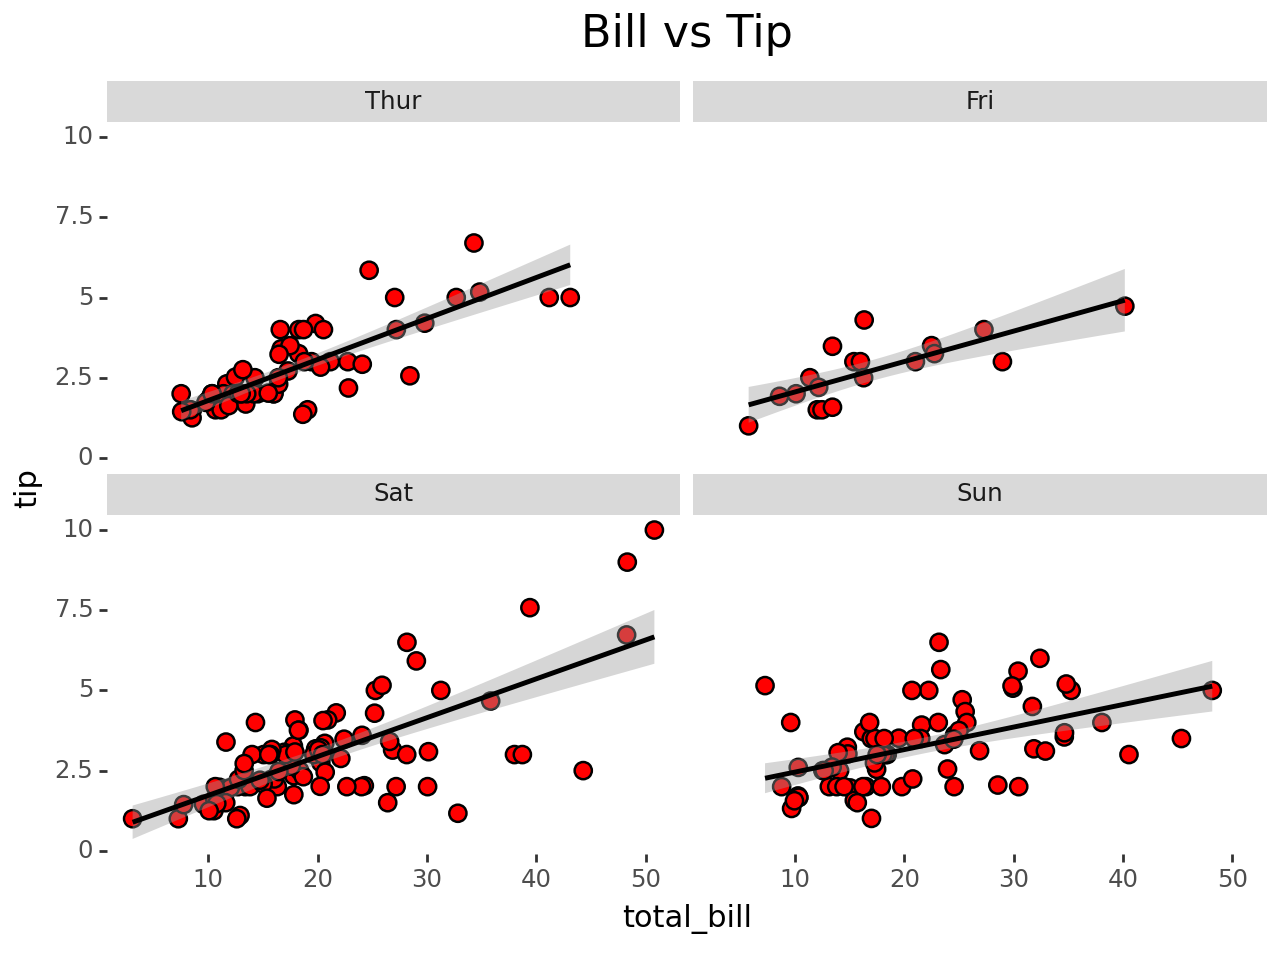

<Figure Size: (640 x 480)>

In [14]:
ggplot(tips_data) + aes(x = "total_bill", y = "tip") + geom_point(size = 3, color = "black", fill = "red") + geom_smooth(method = "lm") + theme(panel_background=element_blank(),
                                                                                                      plot_title= element_text(size = 16,hjust = 0.5))+labs(title = "Bill vs Tip") + facet_wrap("~day")

One notices how the slope of the lines is very similar regardless of the day. What varies in this case is the amount of spending an individual holds during the weekend, which tends to increase. We observe some cases of higher tips on saturdays. Let´s check the evolution of percentage tipping during the week by aggregating a new feature into our data:

In [15]:
mean_tip = tips_data.assign(perc = tips_data.tip/tips_data.total_bill).groupby("day").perc.mean().reset_index(name = "mean")

We have computed the aggregate mean tip by day as a percentage over the total bill. Let´s plot this results as a barchart:

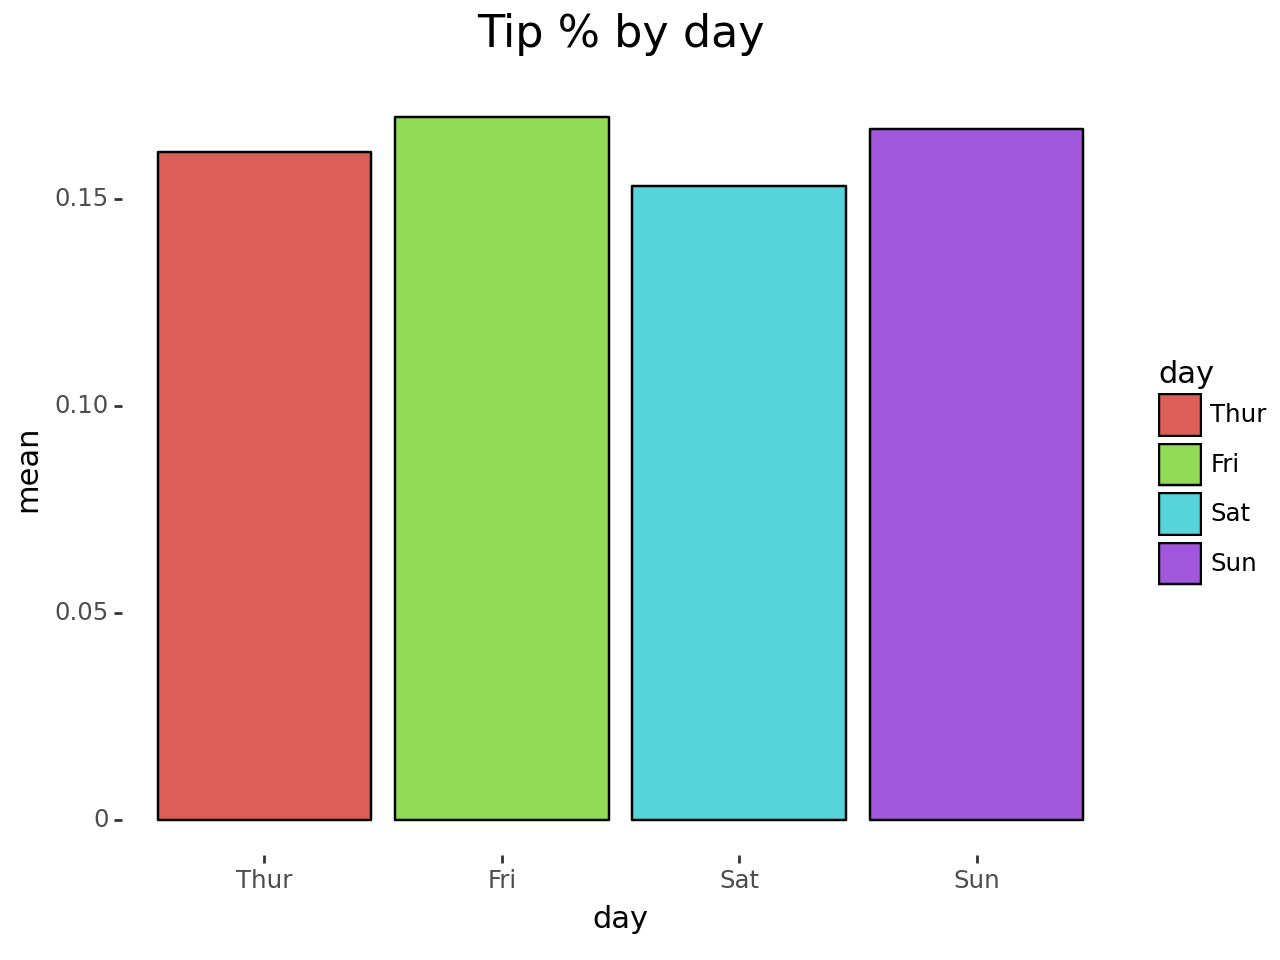

<Figure Size: (640 x 480)>

In [16]:
ggplot(mean_tip) + aes(x = "day", y = "mean", fill = "day") + geom_bar(stat = "identity", color = "black") + theme(panel_background=element_blank(),
                                                                                                      plot_title= element_text(size = 16,hjust = 0.5))+labs(title = "Tip % by day")

We confirm our previous hypothesis such that the tipping amount is independent of the day or the payment amount. An individual is prone to tipping an amount between 15-16% of the total bill and this is independent of other features.

## 3) Is there a significant association between individuals being smokers and the size of the group they tend to eat with? Do females smoke more than males?

We generate to additional datasets which will ease our depicting skills. We will count for the amount of observations of smoking habits, gender and n_people and mutate the data by applying a previous grouping condition (lambda operation). The last step will be to compute the proportion of individuals falling into each category and constructing a barplot. This section requires some previous thinking and data manipulation in order to achieve the desired outcome.

In [17]:
data_3 = tips_data.groupby(["smoker","n_people"]).size().reset_index(name = "n").groupby("smoker").apply(lambda x: x.assign(Total = x.n.sum())).assign(perc = lambda x: x.n/x.Total)

<ipython-input-17-532329e26211>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


In [18]:
data_2 = tips_data.groupby(["smoker","sex"]).size().reset_index(name = "n").groupby("sex").apply(lambda x: x.assign(Total = x.n.sum())).assign(perc = lambda x: x.n/x.Total)

<ipython-input-18-fdb2e769ed35>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


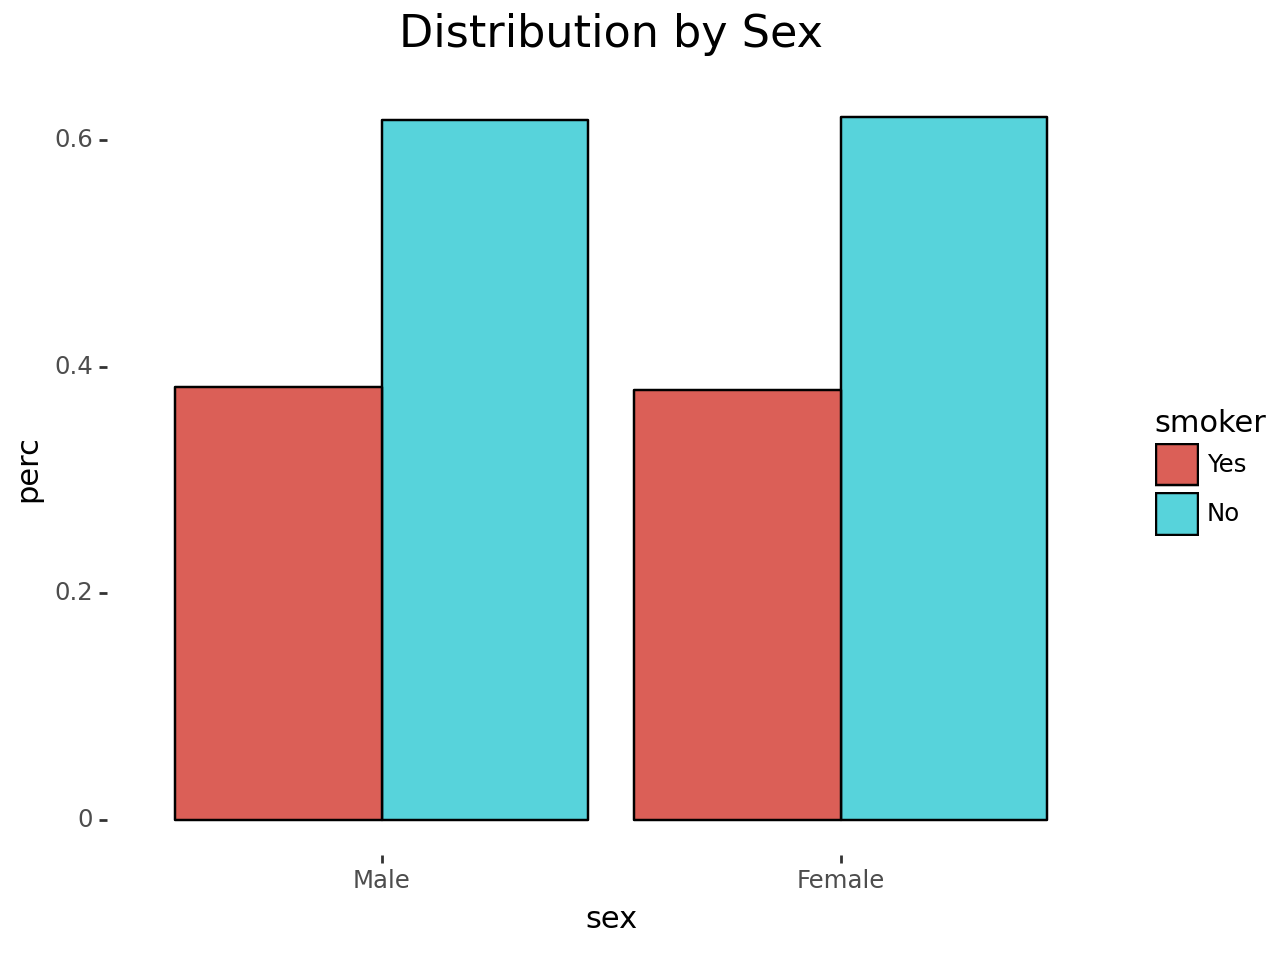

<Figure Size: (640 x 480)>

In [19]:
ggplot(data_2) + aes(x = "sex", y = "perc", fill = "smoker") + geom_bar(stat = "identity", position = "dodge", color = "black") + theme(panel_background=element_blank(),
                                                                                                           plot_title= element_text(size = 16,hjust = 0.5))+labs(title = "Distribution by Sex")

This plot conveys that the proportion of males and females according to smoking habits is symetrically distributed, hence there is no relationship in the sample between smoking and sex. We do find that the mode in both cases is not smoking.

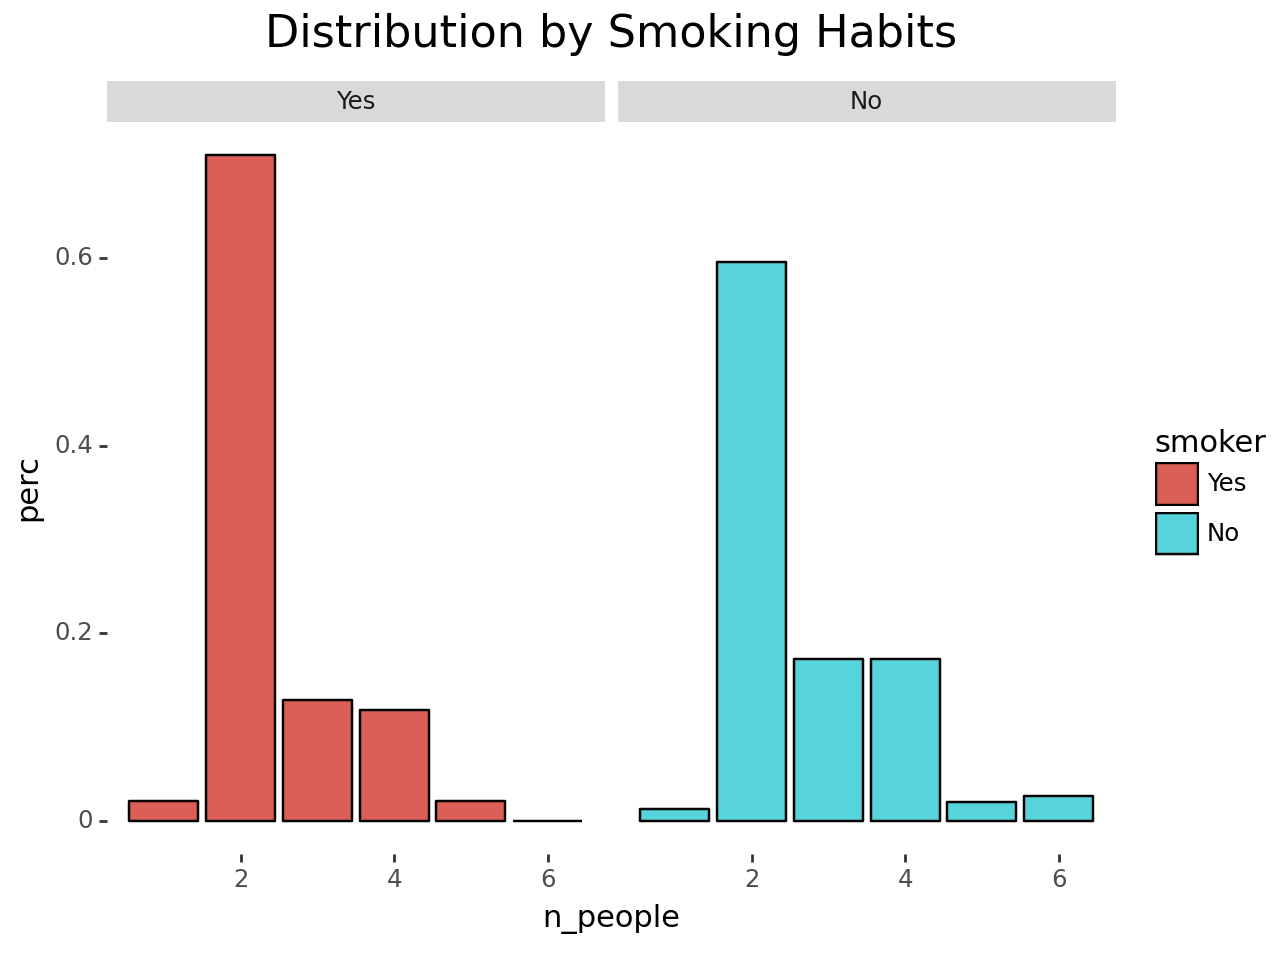

<Figure Size: (640 x 480)>

In [20]:
ggplot(data_3) + aes(x = "n_people", y = "perc", fill = "smoker") + geom_bar(stat = "identity", position = "dodge", color = "black") + facet_wrap("~smoker") + theme(panel_background=element_blank(),
                                                                                                           plot_title= element_text(size = 16,hjust = 0.5),
                                                                                                           )+labs(title = "Distribution by Smoking Habits")

Conditional on being smokers, the proportion of people that come in pairs surpasses 70% whereas we notice a 10% point drop for non-smokers. This might suggest that chances are slimmer for non-smokers to meet **only** with another smoker, perhaps non-smoking fosters the probability of a higher number of people meeting together.

## 4) Correlative Analysis


Delving into correlation exploration, we leverage Plotnine to unveil associations among variables. It's important to note that correlation doesn't imply causation. This visual journey aids in understanding the intricate relationships within our dataset. Let's decode the patterns together!

In the initial phase, we initiate our exploration by computing a correlation matrix. This matrix consists of two columns, representing our attributes, and an additional column revealing the correlation values. This structured format allows us to precisely examine and interpret the relationships between various elements in our dataset.

In [21]:
matrix = tips_data.corr().reset_index().melt(value_vars = ["total_bill","tip","n_people"], id_vars = "index")

<ipython-input-21-18366303e5a2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


$$ r = \frac{cov(X, Y)}{\sigma_X \cdot \sigma_Y} $$


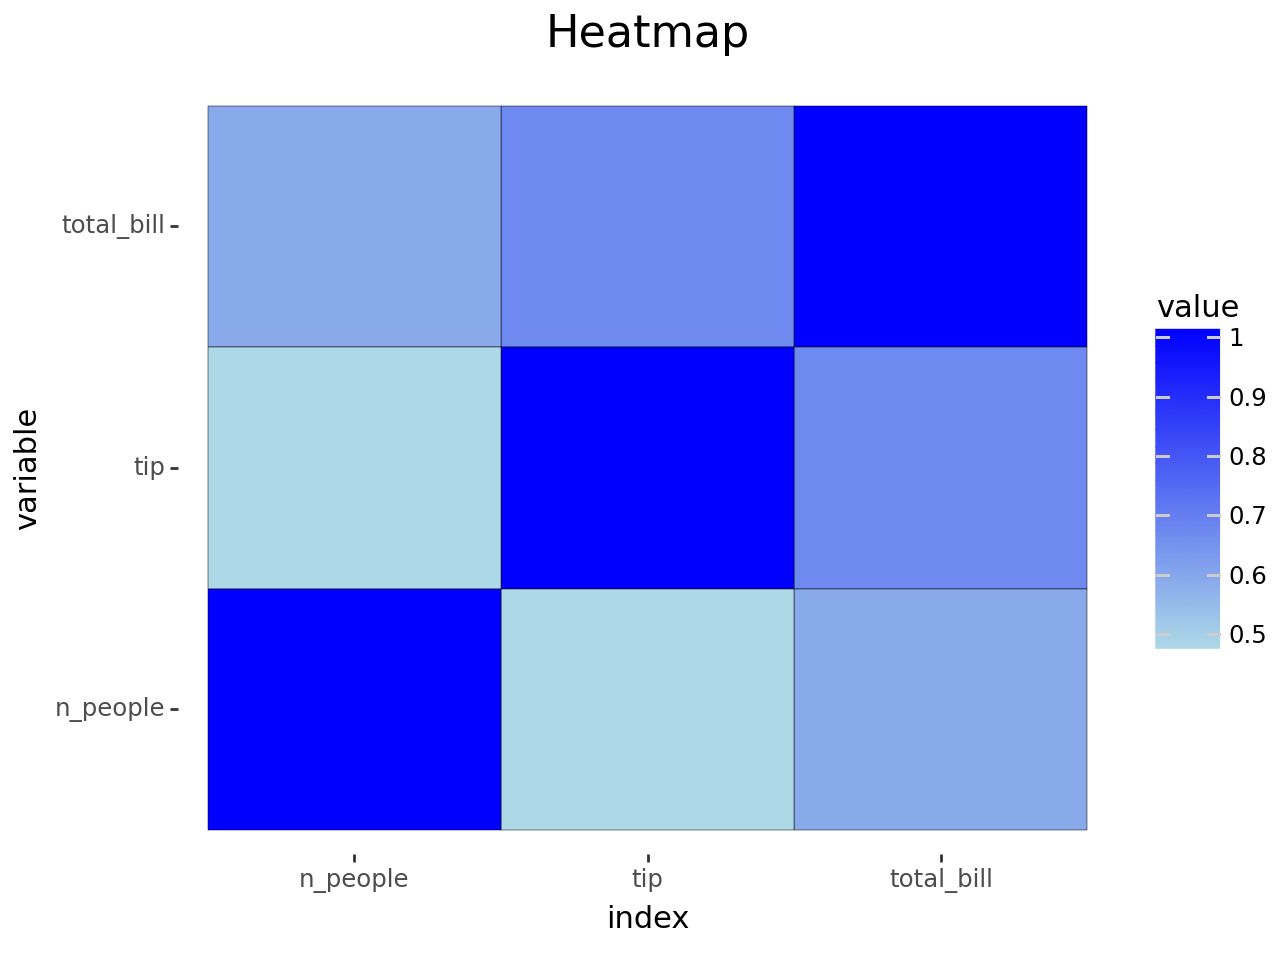

<Figure Size: (640 x 480)>

In [22]:
ggplot(matrix) + aes(x = "index", y = "variable", fill = "value") + geom_tile(color = "black") + labs(title = "Heatmap") + theme(panel_background=element_blank(),
                                                                                                           plot_title= element_text(size = 16,hjust = 0.5),
                                                                                                           ) + scale_fill_gradient(low="lightblue", high="blue")

In constructing a linear model to explore tipping in relation to the total bill, the evident high correlation between these variables suggests that the model would exhibit meaningful results, as indicated by the proportionality of the R squared to the square of the latter. However, delving into a pursuit of the direct causal effect raises concerns of bias, given the observed link between the number of customers and the bill amount. This interdependence implies that higher bills are associated with increased tips, and bills escalate with the number of people, a factor correlated with tips.

A different perspective unveils the violation of the assumption of a null expected value of the error term given the explanatory variable, thereby introducing bias. The inclusion of the number of people in the model might mitigate this bias, but it is probable that the variance of the coefficient linked to the bill amount would rise, leading to the familiar bias-variance trade-off intrinsic to statistical models. The persistently high covariance between our explanatory variables is likely to result in collinearity issues. Consequently, this dilemma contributes to a frequent non-rejection of the null hypothesis in the t-test of variable coefficients, yielding elevated p-values and nonsignificant effects. In the realm of machine learning models, this scenario might manifest as high performance on a training set but suboptimal results when applied to testing criteria.

## Bonus

Let´s take advantage of this Grammar of Graphics in order to paint a plot over another one and accentuate the salience of crucial information within the visual representation. We will first generate an additional Pandas Data Frame excluding the class attribute input as a facet to our code:

In [23]:
tips_data_2 = tips_data[["total_bill","tip","sex","smoker","time","n_people"]]

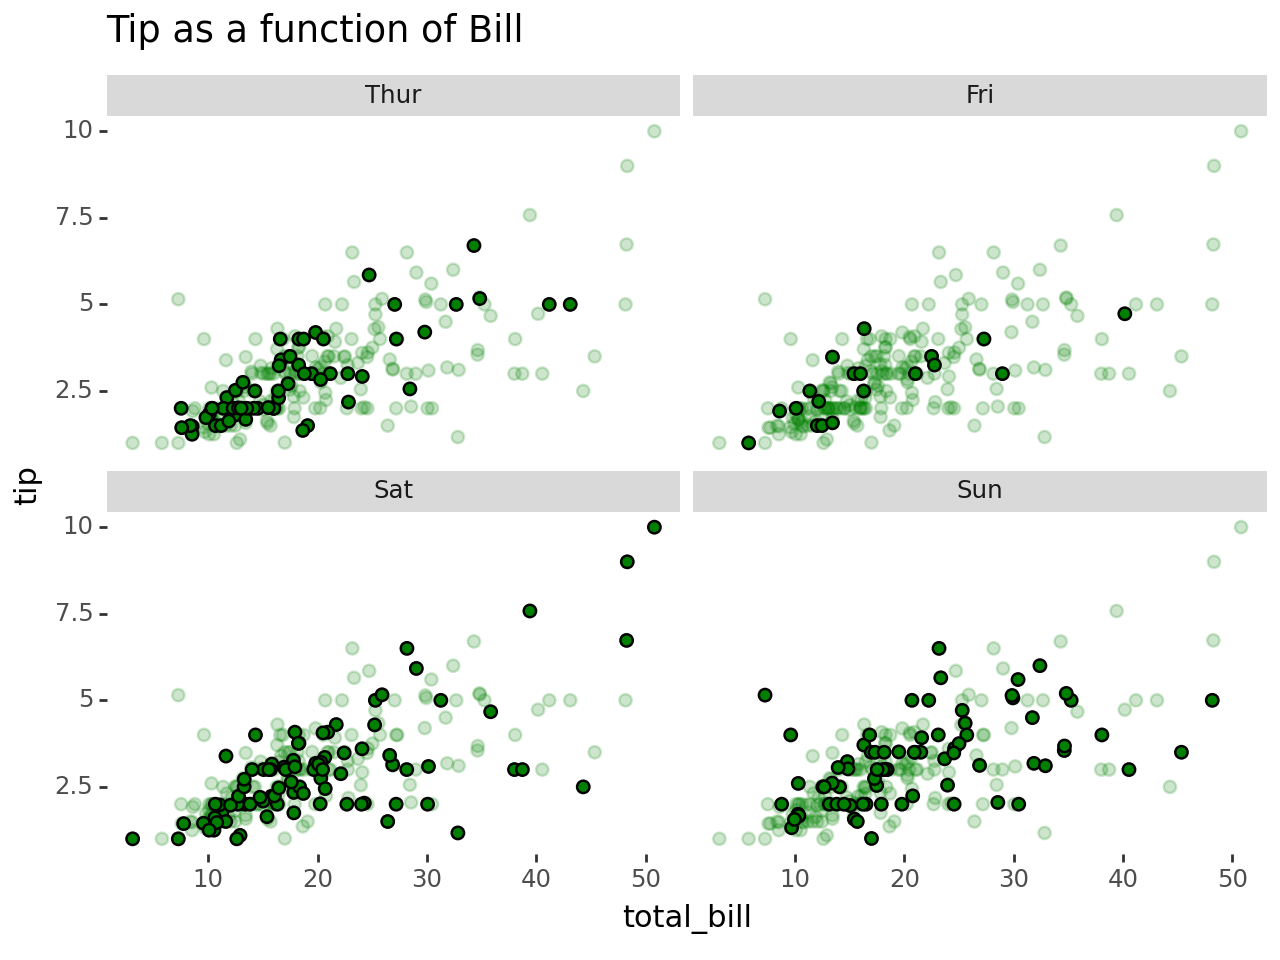

<Figure Size: (640 x 480)>

In [24]:
my_plot = ggplot(tips_data) + aes(x = "total_bill", y = "tip") + geom_point(data = tips_data_2, color = "green", size = 2, alpha = 0.2) + geom_point(fill = "green", size = 2) + facet_wrap("~day") + theme(panel_background = element_blank()) + labs(title = "Tip as a function of Bill")
my_plot

This plot conveys similar information as the previous ones but we are employing the superposition of two plots in front of each other, along with alpha transparency.

In [25]:
%%shell
jupyter nbconvert --to html Plotnine.ipynb

[NbConvertApp] WARNING | pattern 'Plotnine.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Ex

CalledProcessError: ignored